<a href="https://colab.research.google.com/github/Y-Srivaishnavi/ais2101_int_sys/blob/main/assignment3/exercise3/TSP_taxis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [ ]:
N = 10
iterations = 100
particles = 30

In [ ]:
#random coordinates for taxis and customers
np.random.seed(42)
taxi_locations = np.random.rand(N, 2) * 10  # 10x10 city grid
customer_locations = np.random.rand(N, 2) * 10

distance_matrix = cdist(taxi_locations, customer_locations, metric='euclidean')

In [ ]:
class Particle:
    def __init__(self, N):
        self.position = np.zeros((N, N), dtype=int)
        self.velocity = np.random.uniform(-1, 1, (N, N))
        self.best_position = None
        self.best_score = float('inf')
        self.initialize_position()

    def initialize_position(self):
        idx = np.arange(N)
        np.random.shuffle(idx)
        self.position[idx, np.arange(N)] = 1
        self.best_position = np.copy(self.position)
        self.best_score = self.evaluate()

    def evaluate(self):
        return np.sum(self.position * distance_matrix)

    def update(self, global_best, w=0.5, c1=1.5, c2=1.5):
        r1, r2 = np.random.rand(), np.random.rand()
        self.velocity = w * self.velocity + c1 * r1 * (self.best_position - self.position) + c2 * r2 * (global_best - self.position)

        sigmoid = 1 / (1 + np.exp(-self.velocity))
        self.position = (sigmoid > np.random.rand(N, N)).astype(int)

        self.fix_assignment()
        score = self.evaluate()
        if score < self.best_score:
            self.best_score = score
            self.best_position = np.copy(self.position)

    def fix_assignment(self):
        for i in range(N):
            row = self.position[i, :]
            if np.sum(row) != 1:
                self.position[i, :] = 0
                self.position[i, np.random.choice(N)] = 1

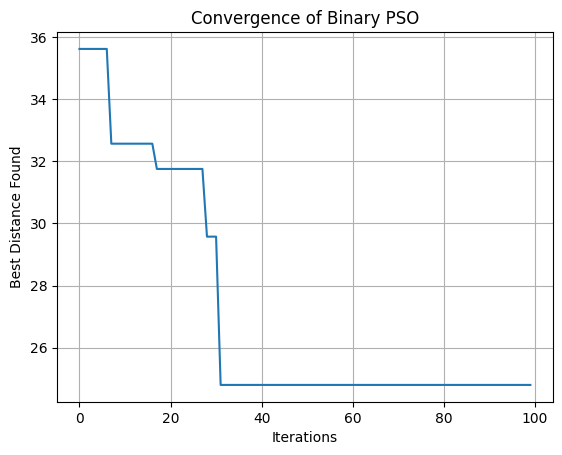

Best assignment matrix:
[[0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]]
Minimum distance: 24.802514849183623


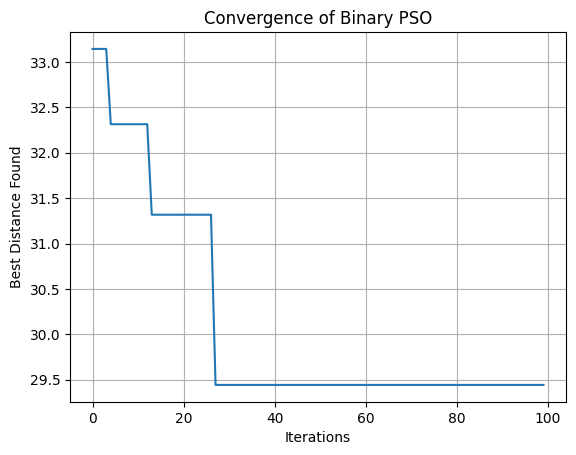

Best assignment matrix:
[[0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]]
Minimum distance: 29.443098314022826


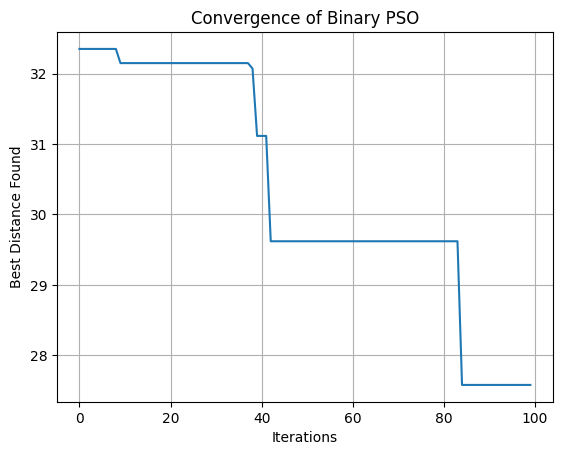

Best assignment matrix:
[[0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]]
Minimum distance: 27.58010509761349


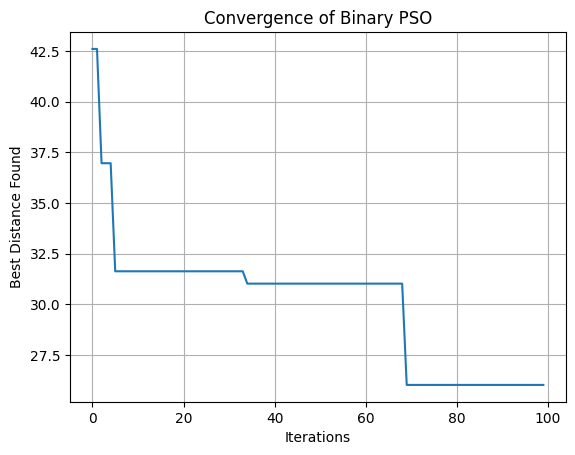

Best assignment matrix:
[[0 0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]]
Minimum distance: 26.018787777268273


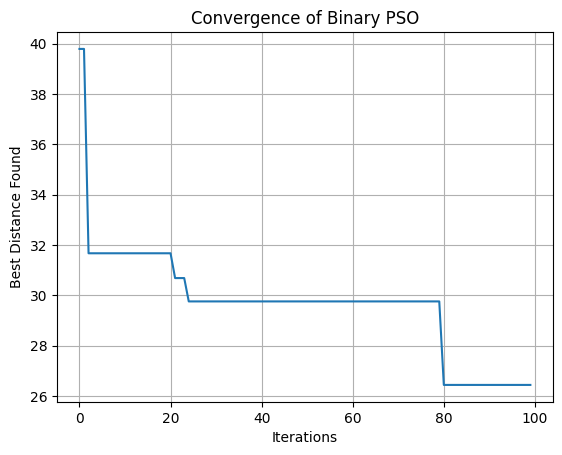

Best assignment matrix:
[[0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]]
Minimum distance: 26.44057968596026


In [ ]:
for _ in range(5):
  swarm = [Particle(N) for _ in range(particles)]
  global_best_position = None
  global_best_score = float('inf')

  convergence = []

  for _ in range(iterations):
      for particle in swarm:
          if particle.best_score < global_best_score:
              global_best_score = particle.best_score
              global_best_position = np.copy(particle.best_position)

      convergence.append(global_best_score)

      for particle in swarm:
          particle.update(global_best_position)

  plt.plot(convergence)
  plt.xlabel('Iterations')
  plt.ylabel('Best Distance Found')
  plt.title('Convergence of Binary PSO')
  plt.grid()
  plt.show()

  print("Best assignment matrix:")
  print(global_best_position)
  print("Minimum distance:", global_best_score)

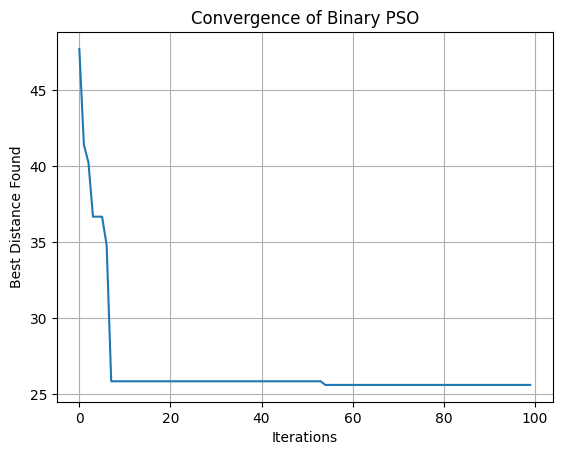

Best assignment matrix:
[[0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]]
Minimum distance: 25.59868446624899


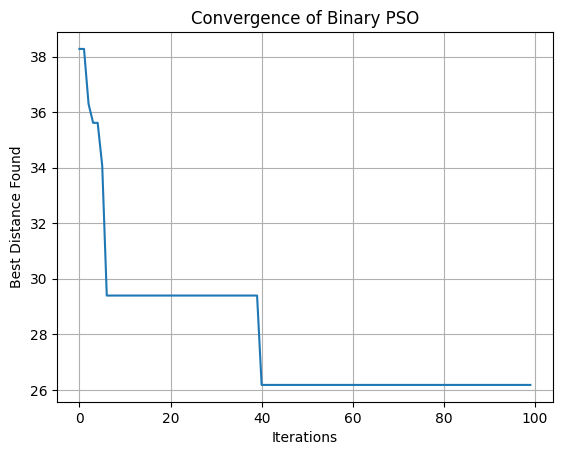

Best assignment matrix:
[[0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]]
Minimum distance: 26.177346309927476


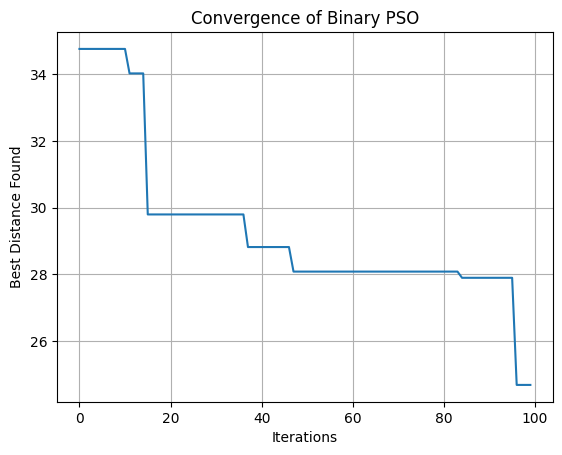

Best assignment matrix:
[[0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]]
Minimum distance: 24.678612014499613


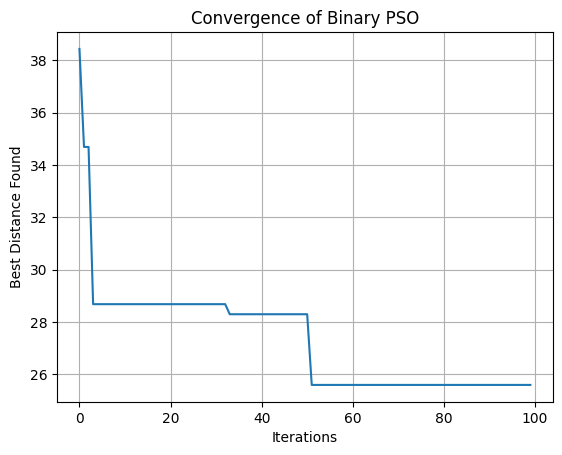

Best assignment matrix:
[[0 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]]
Minimum distance: 25.59840191890411


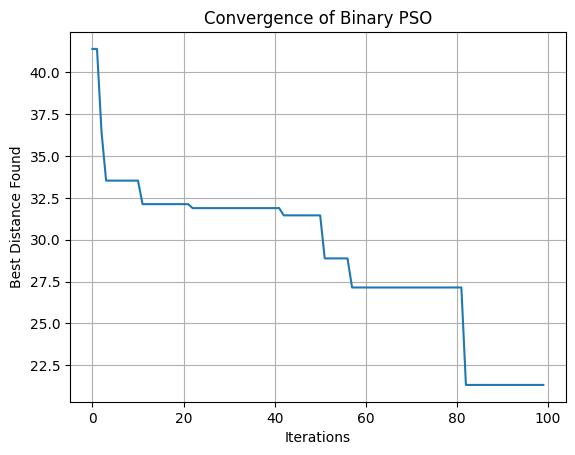

Best assignment matrix:
[[0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]]
Minimum distance: 21.324463550465662


In [ ]:
for _ in range(5):
  swarm = [Particle(N) for _ in range(particles)]
  global_best_position = None
  global_best_score = float('inf')

  convergence = []

  for _ in range(iterations):
      for particle in swarm:
          if particle.best_score < global_best_score:
              global_best_score = particle.best_score
              global_best_position = np.copy(particle.best_position)

      convergence.append(global_best_score)

      for particle in swarm:
          particle.update(global_best_position, w=0)

  plt.plot(convergence)
  plt.xlabel('Iterations')
  plt.ylabel('Best Distance Found')
  plt.title('Convergence of Binary PSO')
  plt.grid()
  plt.show()

  print("Best assignment matrix:")
  print(global_best_position)
  print("Minimum distance:", global_best_score)

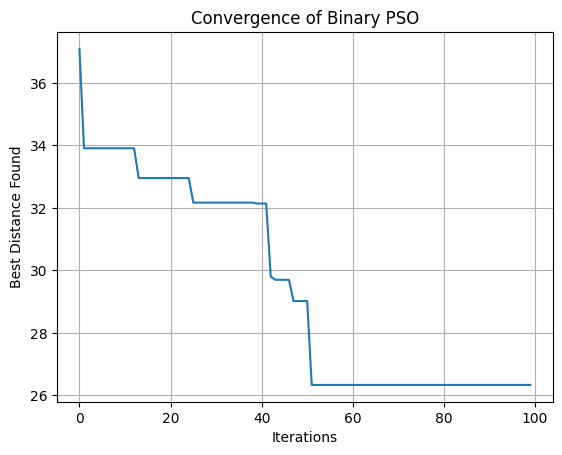

Best assignment matrix:
[[0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 0 0 0]]
Minimum distance: 26.33506915950044


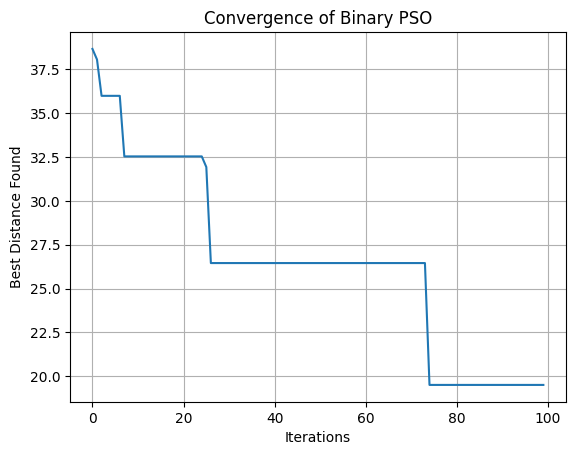

Best assignment matrix:
[[0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 0 0 0]]
Minimum distance: 19.500323046652763


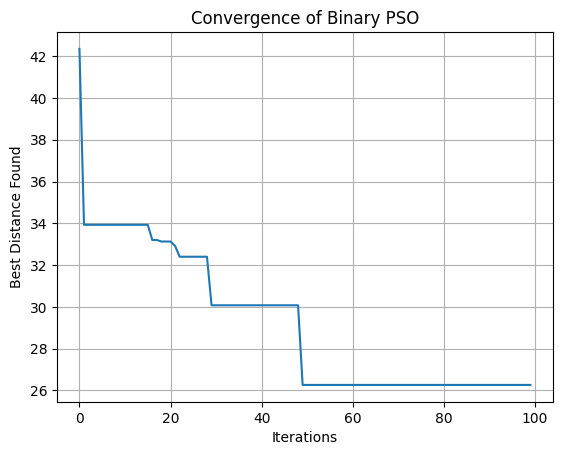

Best assignment matrix:
[[0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]]
Minimum distance: 26.264863729428946


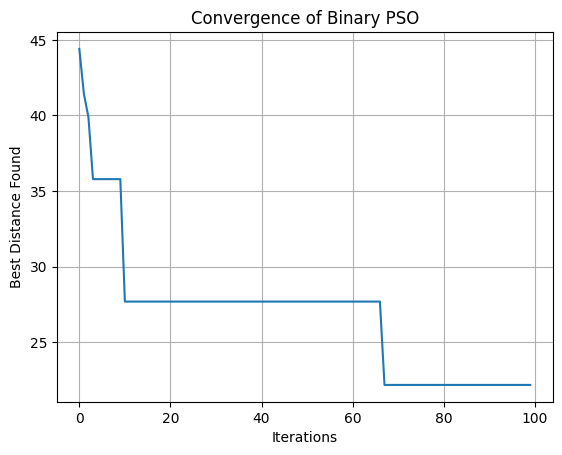

Best assignment matrix:
[[0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]]
Minimum distance: 22.16793657770646


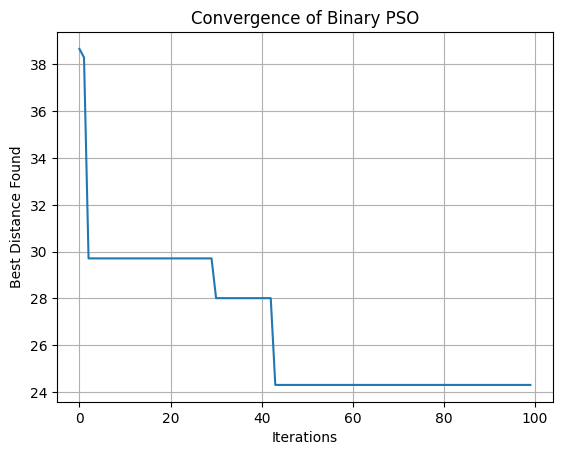

Best assignment matrix:
[[0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]]
Minimum distance: 24.30580735563133


In [ ]:
for _ in range(5):
  swarm = [Particle(N) for _ in range(particles)]
  global_best_position = None
  global_best_score = float('inf')

  convergence = []

  for _ in range(iterations):
      for particle in swarm:
          if particle.best_score < global_best_score:
              global_best_score = particle.best_score
              global_best_position = np.copy(particle.best_position)

      convergence.append(global_best_score)

      for particle in swarm:
          particle.update(global_best_position, w=1)

  plt.plot(convergence)
  plt.xlabel('Iterations')
  plt.ylabel('Best Distance Found')
  plt.title('Convergence of Binary PSO')
  plt.grid()
  plt.show()

  print("Best assignment matrix:")
  print(global_best_position)
  print("Minimum distance:", global_best_score)

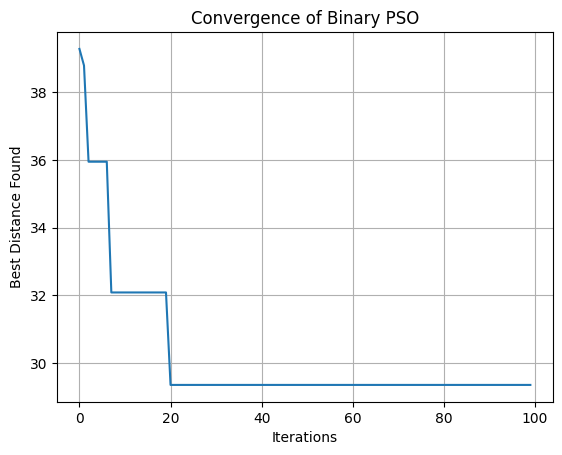

Best assignment matrix:
[[0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]]
Minimum distance: 29.349085352116095


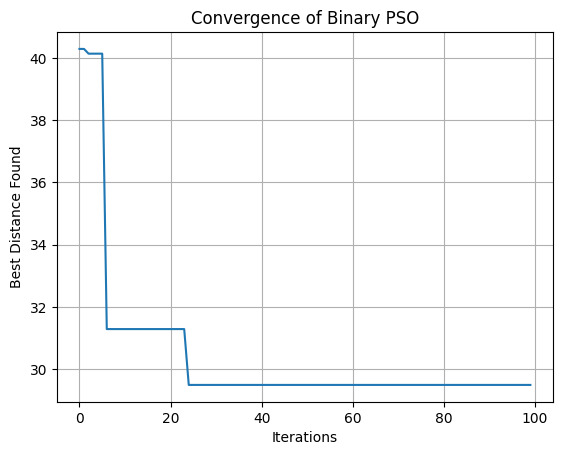

Best assignment matrix:
[[0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]]
Minimum distance: 29.489301159239798


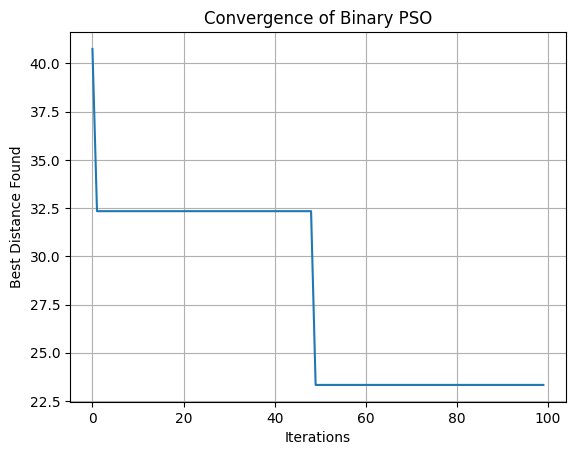

Best assignment matrix:
[[0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0]]
Minimum distance: 23.33034036273506


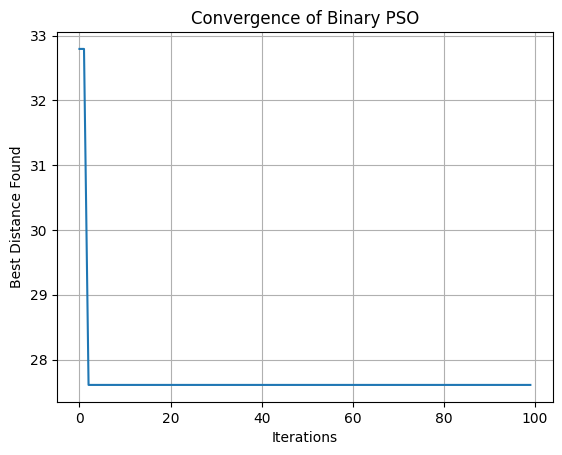

Best assignment matrix:
[[0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]]
Minimum distance: 27.609155167889604


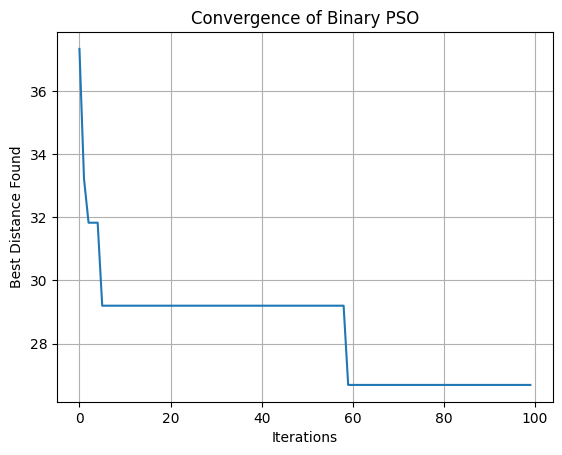

Best assignment matrix:
[[0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]]
Minimum distance: 26.692358397755605


In [ ]:
for _ in range(5):
  swarm = [Particle(N) for _ in range(particles)]
  global_best_position = None
  global_best_score = float('inf')

  convergence = []

  for _ in range(iterations):
      for particle in swarm:
          if particle.best_score < global_best_score:
              global_best_score = particle.best_score
              global_best_position = np.copy(particle.best_position)

      convergence.append(global_best_score)

      for particle in swarm:
          particle.update(global_best_position, c1=1)

  plt.plot(convergence)
  plt.xlabel('Iterations')
  plt.ylabel('Best Distance Found')
  plt.title('Convergence of Binary PSO')
  plt.grid()
  plt.show()

  print("Best assignment matrix:")
  print(global_best_position)
  print("Minimum distance:", global_best_score)

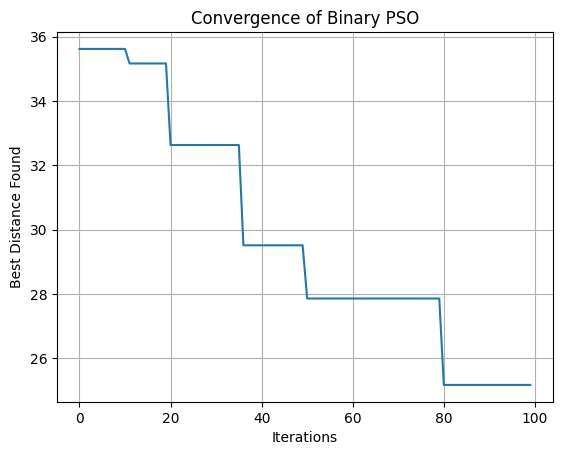

Best assignment matrix:
[[0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]]
Minimum distance: 25.17098703496015


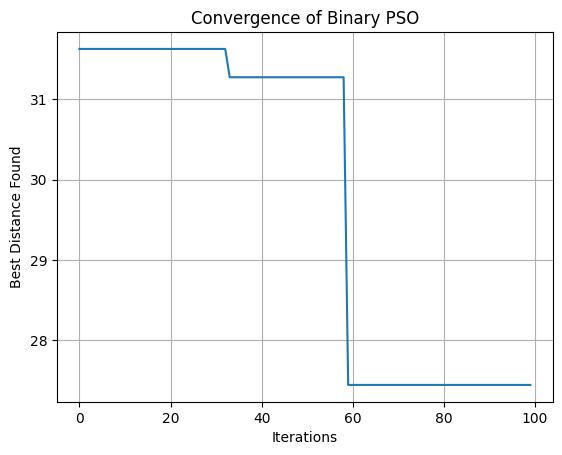

Best assignment matrix:
[[0 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]]
Minimum distance: 27.442733752239807


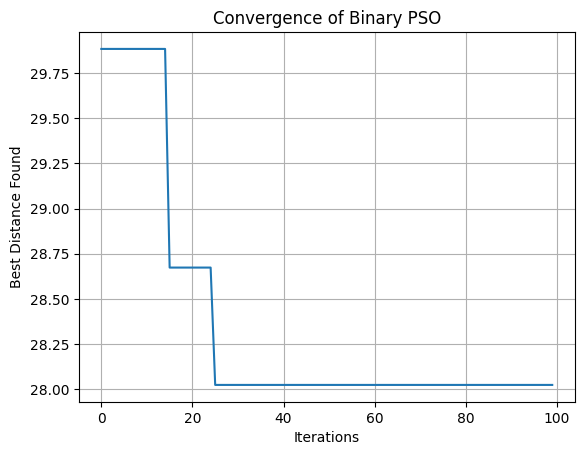

Best assignment matrix:
[[0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]]
Minimum distance: 28.02494506896529


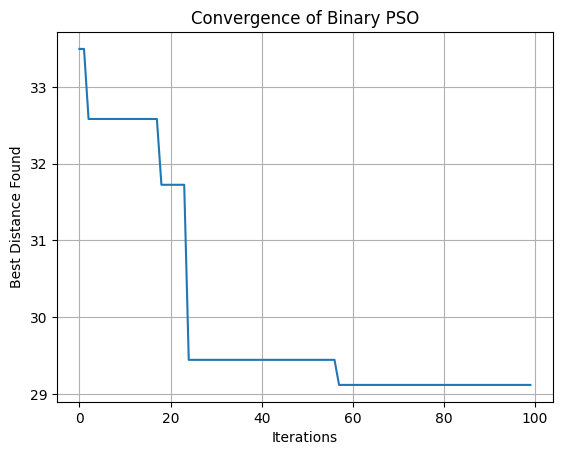

Best assignment matrix:
[[0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 0 0 0]]
Minimum distance: 29.118284348756706


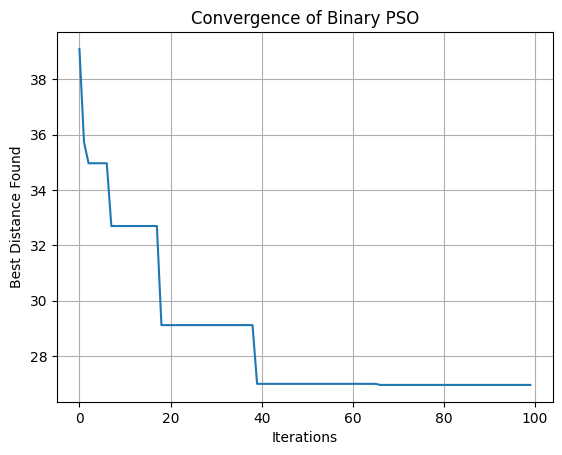

Best assignment matrix:
[[0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]]
Minimum distance: 26.962700249568453


In [ ]:
for _ in range(5):
  swarm = [Particle(N) for _ in range(particles)]
  global_best_position = None
  global_best_score = float('inf')

  convergence = []

  for _ in range(iterations):
      for particle in swarm:
          if particle.best_score < global_best_score:
              global_best_score = particle.best_score
              global_best_position = np.copy(particle.best_position)

      convergence.append(global_best_score)

      for particle in swarm:
          particle.update(global_best_position, c1=2)

  plt.plot(convergence)
  plt.xlabel('Iterations')
  plt.ylabel('Best Distance Found')
  plt.title('Convergence of Binary PSO')
  plt.grid()
  plt.show()

  print("Best assignment matrix:")
  print(global_best_position)
  print("Minimum distance:", global_best_score)

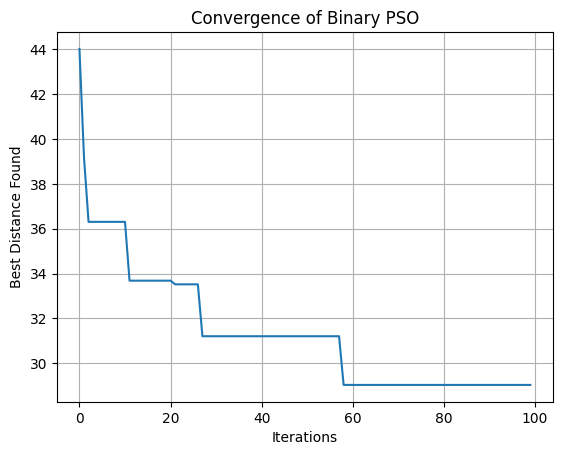

Best assignment matrix:
[[0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]]
Minimum distance: 29.038617420123007


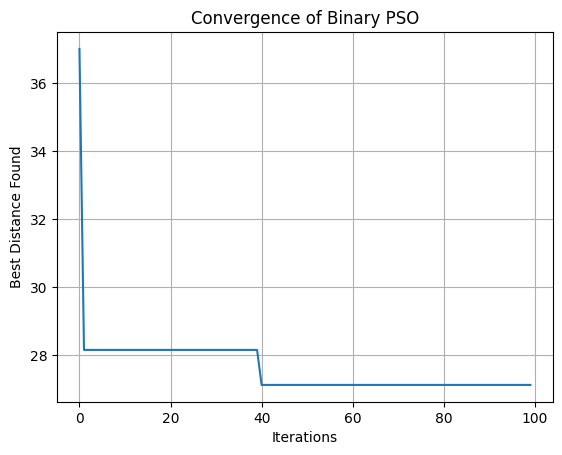

Best assignment matrix:
[[0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]]
Minimum distance: 27.128012950861617


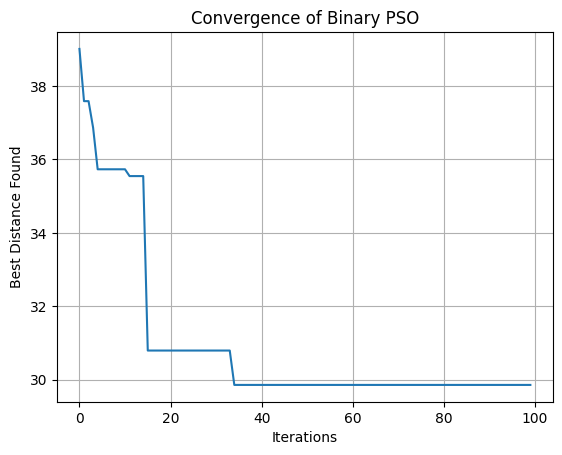

Best assignment matrix:
[[0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]]
Minimum distance: 29.859091946471004


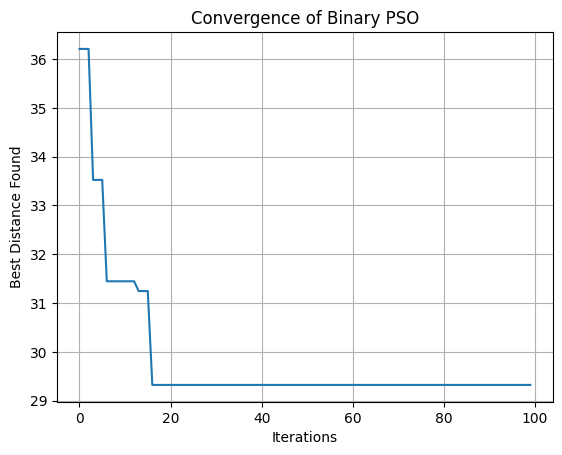

Best assignment matrix:
[[0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]]
Minimum distance: 29.323526841635076


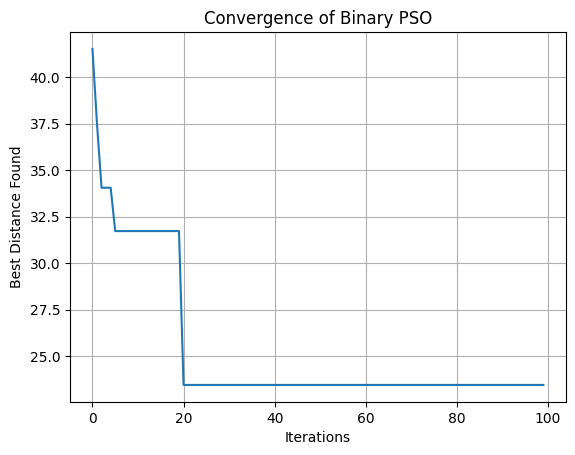

Best assignment matrix:
[[0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]]
Minimum distance: 23.460606111160082


In [ ]:
for _ in range(5):
  swarm = [Particle(N) for _ in range(particles)]
  global_best_position = None
  global_best_score = float('inf')

  convergence = []

  for _ in range(iterations):
      for particle in swarm:
          if particle.best_score < global_best_score:
              global_best_score = particle.best_score
              global_best_position = np.copy(particle.best_position)

      convergence.append(global_best_score)

      for particle in swarm:
          particle.update(global_best_position, c2=1)

  plt.plot(convergence)
  plt.xlabel('Iterations')
  plt.ylabel('Best Distance Found')
  plt.title('Convergence of Binary PSO')
  plt.grid()
  plt.show()

  print("Best assignment matrix:")
  print(global_best_position)
  print("Minimum distance:", global_best_score)

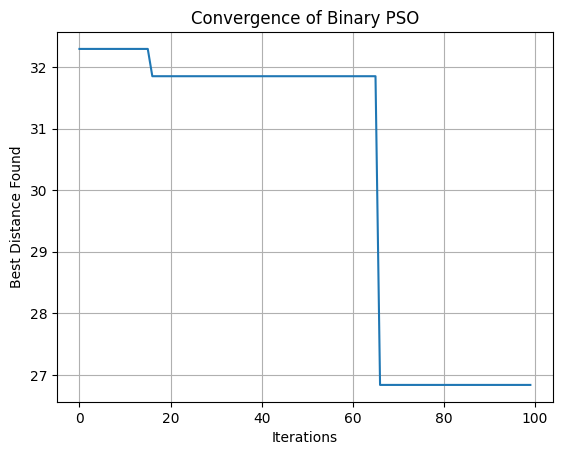

Best assignment matrix:
[[1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]]
Minimum distance: 26.83812463359267


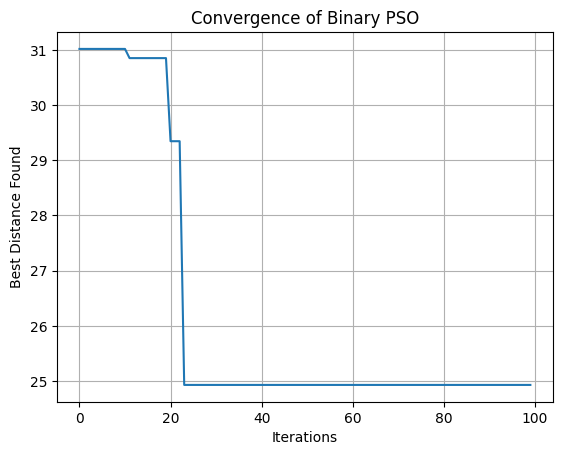

Best assignment matrix:
[[0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]]
Minimum distance: 24.9287965789812


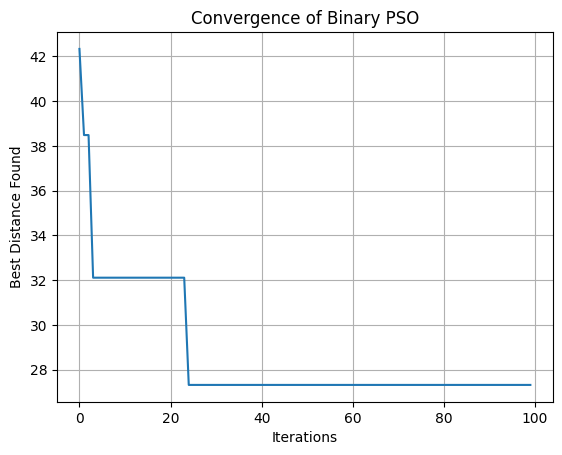

Best assignment matrix:
[[0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]]
Minimum distance: 27.311327479026293


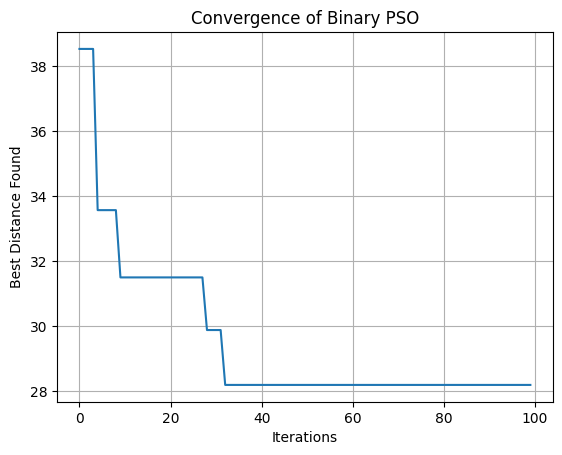

Best assignment matrix:
[[0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]]
Minimum distance: 28.192747000777597


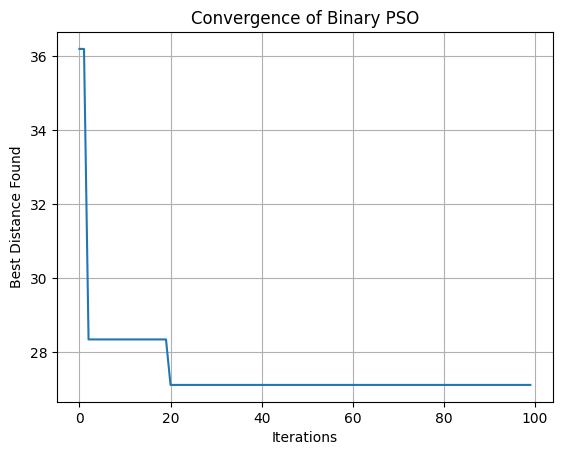

Best assignment matrix:
[[0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]]
Minimum distance: 27.120468894286798


In [ ]:
for _ in range(5):
  swarm = [Particle(N) for _ in range(particles)]
  global_best_position = None
  global_best_score = float('inf')

  convergence = []

  for _ in range(iterations):
      for particle in swarm:
          if particle.best_score < global_best_score:
              global_best_score = particle.best_score
              global_best_position = np.copy(particle.best_position)

      convergence.append(global_best_score)

      for particle in swarm:
          particle.update(global_best_position, c2=2)

  plt.plot(convergence)
  plt.xlabel('Iterations')
  plt.ylabel('Best Distance Found')
  plt.title('Convergence of Binary PSO')
  plt.grid()
  plt.show()

  print("Best assignment matrix:")
  print(global_best_position)
  print("Minimum distance:", global_best_score)